<a href="https://colab.research.google.com/github/Yk-rin04/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Work1
pandasを使ったプログラム

AKB48のCDシングルのデータを用いた，売り上げ枚数ランキング（ランキングの中の欲しい情報だけ抜き出せるようにもする），曲ごとの売り上げ枚数の変化のグラフ，などを表示できるプログラム

##全体の機能  
検索機能  
・タイトル検索  
・発売年検索  
・年ごとの売り上げ枚数の検索  
・ジャケット写真検索  
・センターになった人物検索  
グラフ表示機能  
・累計売上枚数のグラフ(一曲ごと)  
・年ごとの売り上げ枚数のグラフ  
・センターになった人物の務めた回数上位10人のグラフ  
・売り上げ枚数上位１０曲のグラフ  

まずはそれぞれの機能を別々でプログラミングすることで，機能ごとの不具合をすぐに確認できるようにした．また，最後に一つのコードにまとめたことで，対話をしながら様々な機能を使えるようにした．

##準備

まずは下のコードを実行する  
上のコード：グラフに日本語を表示するためにインストール  
真ん中のコード：様々なものをインストールする  
下のコード：ジャケット写真をgoogle colabにインストール  
・ジャケット写真に使ったデータ(URL:https://www.akb48.co.jp/about/discography)

In [10]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd                             #pandasの機能のインストール
from matplotlib import pyplot as plt            #グラフを描くためpyplotをインストール
import numpy as np                              #numpyの機能のインストール
import cv2, sys                                 #画像ファイルを開くために必要
from google.colab.patches import cv2_imshow     #同上
import japanize_matplotlib                      #グラフで日本語を表示するために必要
import seaborn as sns                           #すぐ下のコードを機能させるのに要る
sns.set(font="IPAexGothic")                     #グラフでの日本語表示のフォント指定

In [12]:
!wget "https://drive.google.com/uc?export=download&id=1QRc1mqoZ_SoP72WP3bXKVNZaozvwaely" -O AKB48.zip
!unzip -o AKB48.zip

--2022-12-25 02:39:51--  https://drive.google.com/uc?export=download&id=1QRc1mqoZ_SoP72WP3bXKVNZaozvwaely
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.102, 172.217.203.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8ggq8ljb3jjtuc8lralpc0reot3svsov/1671935925000/17683572045165564493/*/1QRc1mqoZ_SoP72WP3bXKVNZaozvwaely?e=download&uuid=fca07621-2b92-4210-a87d-83e427a56bdb [following]
--2022-12-25 02:39:52--  https://doc-14-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8ggq8ljb3jjtuc8lralpc0reot3svsov/1671935925000/17683572045165564493/*/1QRc1mqoZ_SoP72WP3bXKVNZaozvwaely?e=download&uuid=fca07621-2b92-4210-a87d-83e427a56bdb
Resolving doc-14-cc-docs.googleusercontent.com (doc-14-cc-docs.googleusercontent.com)... 74.125.28.132, 26

AKB48のCDシングルに関するデータフレームの作成をする．   
「Baby!Baby!Baby!」「元カレです」「久しぶりのリップグロス」はデータがなかったため含んでいない．  
センターの人が複数いる場合，用いたサイトの一番左側に記載されている人物のみを使用した  

使ったデータ  
・曲名，発売日，累計売上(URL:https://nendai-ryuukou.com/artist/005.html)  
・センターの人(URL:https://entamedata.com/2020/01/28/akb48%E6%AD%B4%E4%BB%A3%E3%82%B7%E3%83%B3%E3%82%B0%E3%83%AB%E3%81%AE%E3%82%BB%E3%83%B3%E3%82%BF%E3%83%BC%E3%81%A8%E9%81%B8%E6%8A%9C%E3%83%A1%E3%83%B3%E3%83%90%E3%83%BC%E3%81%AF%EF%BC%9F/)

In [13]:
df = pd.DataFrame(['桜の花びらたち','スカートひらり','会いたかった',
                   '制服が邪魔をする','軽蔑していた愛情','BINGO!','僕の太陽','夕陽を見ているか?',
                   'ロマンス，イラネ','桜の花びらたち2008','大声ダイヤモンド',
                   '10年桜','涙サプライズ!','言い訳Maybe','RIVER',
                   '桜の栞','ポニーテールとシュシュ','ヘビーローテーション','Beginner','チャンスの順番',
                   '桜の木になろう','Everyday，カチューシャ','フライングゲット','風は吹いている','上からマリコ',
                   'GIVE ME FIVE!','真夏のSounds good!','ギンガムチェック','UZA','永遠プレッシャー',
                   'So long!','さよならクロール','恋するフォーチュンクッキー','ハート・エレキ','鈴懸なんちゃら',
                   '前しか向かねえ','ラブラドール・レトリバー','心のプラカード','希望的リフレイン',
                   'Green Flash','僕たちは戦わない','ハロウィンナイト','唇にBe My Baby',
                   '君はメロディー','翼はいらない','LOVE TRIP/しあわせを分けなさい','ハイテンション',
                   'シュートサイン','願いごとの持ち腐れ','#好きなんだ','11月のアンクレット',
                   'ジャーバージャ','Teacher Teacher','センチメンタルトレイン','NO WAY MAN',
                   'ジワるDAYS','サステナブル',
                   '失恋，ありがとう',
                   '根も葉もRumor'])

df.columns = ['タイトル']

df['発売日'] = ['2006.02.01','2006.06.07','2006.10.25',
             '2007.01.31','2007.04.18','2007.07.18','2007.08.08.','2007.10.31',
             '2008.01.23','2008.02.27','2008.10.22',
             '2009.03.04','2009.06.24','2009.08.26','2009.10.21',
             '2010.02.17','2010.05.26','2010.08.18','2010.10.27','2010.12.08',
             '2011.02.16','2011.05.25','2011.08.24','2011.10.26','2011.12.07',
             '2012.02.15','2012.05.23','2012.08.29','2012.10.31','2012.12.05',
             '2013.02.20','2013.05.22','2013.08.21','2013.10.30','2013.11.12',
             '2014.02.26','2014.05.21','2014.08.27','2014.11.26',
             '2015.03.04','2015.05.20','2015.08.26','2015.12.09',
             '2016.03.09','2016.06.01','2016.08.31','2016.11.16',
             '2017.03.15','2017.03.15','2017.08.30','2017.11.22',
             '2018.03.14','2018.05.30','2018.09.19','2018.11.28',
             '2019.03.13','2019.09.18',
             '2020.03.18',
             '2021.09.29']

df['累計売上(枚)'] = [46274,20609,55308,
                 21989,22671,25611,28840,18429,
                 23209,28429,96566,
                 124700,168826,145776,260553,
                 404696,740291,880761,1039362,694042,
                 1081686,1608299,1625849,1457113,1304903,
                 1436519,1822220,1314428,1263148,1206869,
                 1132853,1955162,1528852,1286609,1084455,
                 1148657,1662265,1061760,1197482,
                 1045000,1782000,1326000,1088276,
                 1294962,1519387,1213660,1202533,
                 1086000,1391000,1123000,1113000,
                 1172000,1819000,1471000,1213000,
                 1309000,1410000,
                 1181000,
                 412000]

df['センター'] = ['高橋みなみ','高橋みなみ','前田敦子',
              '高橋みなみ','高橋みなみ','高橋みなみ','前田敦子','前田敦子',
              '前田敦子','高橋みなみ','前田敦子',
              '前田敦子','前田敦子','前田敦子','前田敦子',
              '前田敦子','前田敦子','大島優子','前田敦子','内田眞由美',
              '前田敦子','前田敦子','前田敦子','前田敦子','篠田麻里子',
              '前田敦子','前田敦子','大島優子','大島優子','島崎遥香',
              '渡辺麻友','渡辺麻友','篠原莉乃','小嶋陽菜','松井珠理奈',
              '大島優子','渡辺麻友','渡辺麻友','渡辺麻友',
              '柏木由紀','島崎遥香','篠原莉乃','高橋みなみ',
              '宮脇咲良','向井地美音','篠原莉乃','島崎遥香',
              '小嶋陽菜','松井珠理奈','篠原莉乃','渡辺麻友',
              '岡田奈々','小栗有似','松井珠理奈','宮脇咲良',
              '篠原莉乃','矢作萌夏',
              '山内瑞葵',
              '岡田奈々']

df

,タイトル,発売日,累計売上(枚),センター
0,桜の花びらたち,2006.02.01,46274,高橋みなみ
1,スカートひらり,2006.06.07,20609,高橋みなみ
2,会いたかった,2006.10.25,55308,前田敦子
3,制服が邪魔をする,2007.01.31,21989,高橋みなみ
4,軽蔑していた愛情,2007.04.18,22671,高橋みなみ
5,BINGO!,2007.07.18,25611,高橋みなみ
6,僕の太陽,2007.08.08.,28840,前田敦子
7,夕陽を見ているか?,2007.10.31,18429,前田敦子
8,ロマンス，イラネ,2008.01.23,23209,前田敦子
9,桜の花びらたち2008,2008.02.27,28429,高橋みなみ


##機能をつくる

グラフ表示機能  
・累計売上枚数のグラフ  
一曲一曲の売り上げをその曲が発売された年順にグラフ化．また，最も売れた年，最も売れなかった年のデータをそれぞれ赤と青のポイントで示すことによって，より見やすいグラフにした．  
・年ごとの売り上げ枚数のグラフ  
発売年によって売り上げ枚数がどう変化していくのかわかるようにグラフ化．横軸は発売年，縦軸は売り上げ枚数とした．  
・センターになった人のなった回数上位10人のグラフ  
センターになった人の内何回なったかをカウントし，上位10人をグラフに表示  
・売り上げ枚数上位10曲のグラフ  
売り上げ枚数の良かったもの上位10曲をグラフで表示

累計売上枚数のグラフ


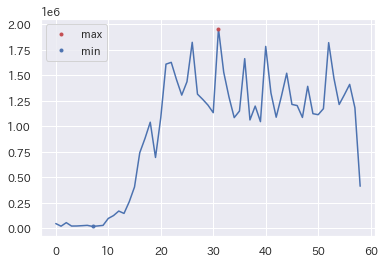

年ごとの売り上げ枚数のグラフ


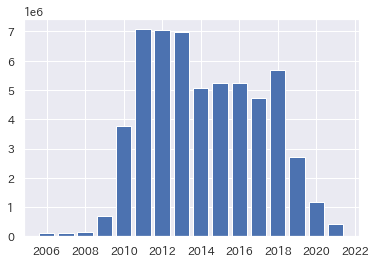

In [14]:
#累計売上枚数のグラフ
print('累計売上枚数のグラフ')
max_index = df['累計売上(枚)'].idxmax()
min_index = df['累計売上(枚)'].idxmin()
max = df['累計売上(枚)'].max()
min = df['累計売上(枚)'].min()
plt.plot(df['累計売上(枚)'])
plt.plot(max_index, max, '.', c='r',label='max')
plt.plot(min_index, min, '.', c='b',label='min')
plt.legend()
plt.show()

#年ごとの売り上げ枚数のグラフ
print('年ごとの売り上げ枚数のグラフ')
t = 2006
list1 = []
list2 = []
while t <= 2021:
  sum = df[ df['発売日'].str.contains('{}'.format(t))]['累計売上(枚)'].sum()
  list1.append(t)
  list2.append(sum)
  t += 1
#print(list1)
plt.bar(list1,list2)
plt.show()

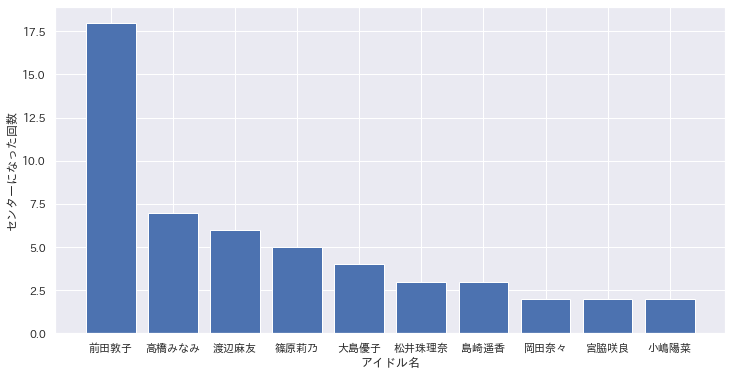

In [15]:
#センターになった人のなった回数上位10人のグラフ 
list1 = []
list2 = []
DF = pd.DataFrame()
DF.head()

for i in range(len(df)):
  df1 = df.iloc[[i]]['センター']
  name = df1.iloc[-1]
  #print(name)
  if name not in list1:
    list1.append(name)
  else:
    continue
#print(list1)

for x in list1:
  count = len( df[ df['センター'].str.contains('{}'.format(x))])
  list2.append(count)
#print(list2)

for i in range(len(list1)):
  c1 = list1[i]
  c2 = list2[i]
  DF = DF.append({'name':c1 ,'count':c2},ignore_index=True)

DF_sort = DF.sort_values('count',ascending=False)
DF10 = DF_sort[:10]

fig, axes = plt.subplots(figsize=(12,6))
plt.bar(DF10['name'],DF10['count'])
plt.xlabel('アイドル名')
plt.ylabel('センターになった回数')
plt.show()


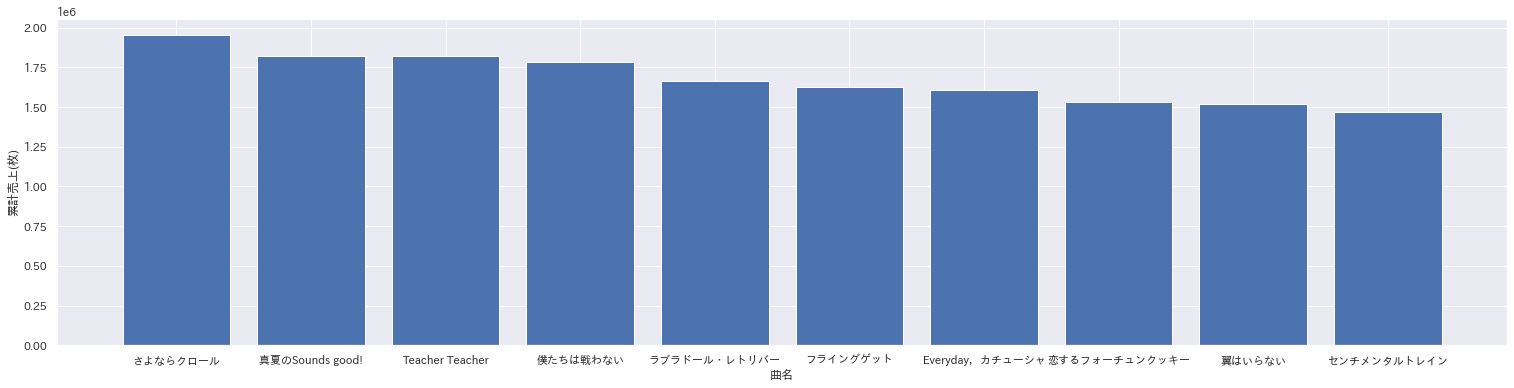

In [16]:
#売り上げ枚数上位10曲のグラフ

df_music = df.sort_values('累計売上(枚)',ascending=False)
dfm = df_music[:10]

fig, axes = plt.subplots(figsize=(26,6))
plt.bar(dfm['タイトル'],dfm['累計売上(枚)'])
plt.xlabel('曲名')
plt.ylabel('累計売上(枚)')
plt.show()

検索機能  
・タイトル検索  
タイトルを検索することができる．キーワードを入力すると該当する曲に関する情報が表として表示される．また，入力されたキーワードが存在しなかった場合は，存在しないと表示する．  
・発売年検索  
探したい年を入力すると，その年に発売された曲の情報について表示される．入力された年がデビュー前の時はデータが存在しないと表示，データが存在しない2022年以降はまだ結果はないということを表示する．  
・年ごとの売り上げ枚数の表示  
入力した年に発売された曲の売り上げ枚数を計算し，表示する．入力された年がデビュー前の時はデータが存在しないと表示，データが存在しない2022年以降はまだ結果はないということを表示する．  
・ジャケット写真検索  
曲名か発売年か人物名を入力すると条件を満たすジャケット写真の表示  
・センターになった人物検索  
人の名前を入力するとその人がセンターを務めた曲についての情報が出てくる．

In [17]:
#タイトル検索
search = input('タイトル検索:')
df1 = df[ df['タイトル'].str.contains('{}'.format(search))]
df2 = df.index[df['タイトル'].str.contains('{}'.format(search))].tolist()
if df2 == [] :
  print('入力されたキーワードに該当する曲は存在しません．')
  df1 = pd.DataFrame()

df1

タイトル検索:0


,タイトル,発売日,累計売上(枚),センター
9,桜の花びらたち2008,2008.02.27,28429,高橋みなみ
11,10年桜,2009.03.04,124700,前田敦子


In [18]:
#発売年検索
search = int(input('発売年検索(西暦):'))
if search < 2006:
    print('デビュー前なのでデータがありません')
    df1 = pd.DataFrame()

elif 2022 <= search:
    print('まだ結果は出ていません')
    df1 = pd.DataFrame()

else:
  df1 = df[ df['発売日'].str.contains('{}.'.format(search))]

df1

発売年検索(西暦):2013


,タイトル,発売日,累計売上(枚),センター
30,So long!,2013.02.20,1132853,渡辺麻友
31,さよならクロール,2013.05.22,1955162,渡辺麻友
32,恋するフォーチュンクッキー,2013.08.21,1528852,篠原莉乃
33,ハート・エレキ,2013.10.30,1286609,小嶋陽菜
34,鈴懸なんちゃら,2013.11.12,1084455,松井珠理奈


In [19]:
#年ごとの売り上げ枚数の表示
while True:
  year = int(input('どの年？:'))
  if year < 2006:
    print('デビュー前なのでデータがありません')
    continue
  elif 2022 <= year:
    print('まだ結果は出ていません')
    continue
    
  sum = df[ df['発売日'].str.contains('{}'.format(year))]['累計売上(枚)'].sum()
  break

print('{}年:{}枚'.format(year,sum))

どの年？:2013
2013年:6987931枚


曲名から調べる？年で調べる？センターの人で調べる？
曲名：0  年：1  センター:2 を入力2
人物名は？:宮脇咲良
43


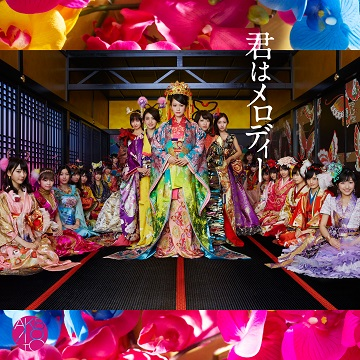

54


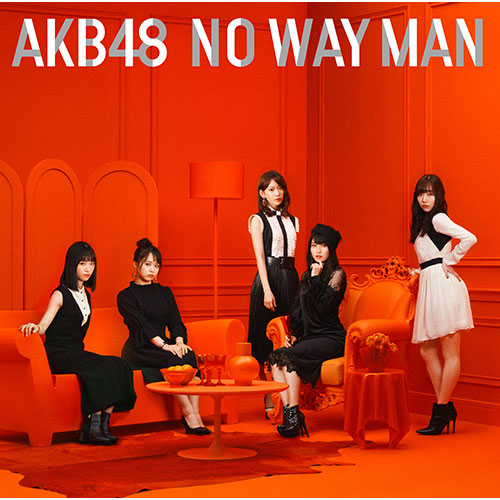

In [20]:
#ジャケット写真検索
print('曲名から調べる？年で調べる？センターの人で調べる？')
search = int(input('曲名：0  年：1  センター:2 を入力'))

if search == 0:
  kyoku = input('曲名は？:')
  
  df1 = df.index[df['タイトル'].str.contains('{}'.format(kyoku))].tolist()
  
  if df1 == []:
    print('そのキーワードが含まれる曲はありません')
  #print(df1)

elif search == 1:
  tosi = int(input('発売年検索(西暦):'))
  if tosi < 2006:
    print('デビュー前なのでデータがありません')
  elif 2022 <= tosi:
    print('まだ結果は出ていません')

  df1 = df.index[df['発売日'].str.contains('{}'.format(tosi))].tolist()

elif search == 2:
  person = input('人物名は？:')
  df1 = df.index[df['センター'].str.contains('{}'.format(person))].tolist()
  if df1 == []:
    print('その人はセンターを務めていません')

else:
  print('0か1か2で入力してください')

for i in df1:
  print(i)
  file = '{:}.jpg'.format(i)
  img = cv2.imread( file )
  if img is None:
    sys.exit(f'エラー: ファイルを開けませんでした {file}')
  cv2_imshow(img)

In [21]:
#センターになった人物検索
search = input('人物検索:')
df1 = df[ df['センター'].str.contains('{}'.format(search))]
df2 = df.index[df['センター'].str.contains('{}'.format(search))].tolist()
if df2 == [] :
  print('入力された人物はセンターを務めていません．')
  df1 = pd.DataFrame()

df1

人物検索:前田敦子


,タイトル,発売日,累計売上(枚),センター
2,会いたかった,2006.10.25,55308,前田敦子
6,僕の太陽,2007.08.08.,28840,前田敦子
7,夕陽を見ているか?,2007.10.31,18429,前田敦子
8,ロマンス，イラネ,2008.01.23,23209,前田敦子
10,大声ダイヤモンド,2008.10.22,96566,前田敦子
11,10年桜,2009.03.04,124700,前田敦子
12,涙サプライズ!,2009.06.24,168826,前田敦子
13,言い訳Maybe,2009.08.26,145776,前田敦子
14,RIVER,2009.10.21,260553,前田敦子
15,桜の栞,2010.02.17,404696,前田敦子


##すべての機能まとめて一つのプログラムにする

AKB48のCDシングルについての情報について調べられるプログラムです．

どの機能を利用しますか？
検索:0  グラフ表示:1
数字を入力:0


どの検索機能を利用しますか
タイトル検索:0  発売年検索:1  年ごとの売り上げ枚数の表示:2  ジャケット写真検索:3  センターの人物検索:4 
数字を入力:3

曲名から調べる？年で調べる？
曲名：0  年：1  センター:2 を入力2
人物名は？:宮脇咲良
43


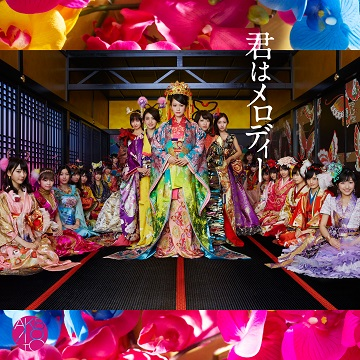

54


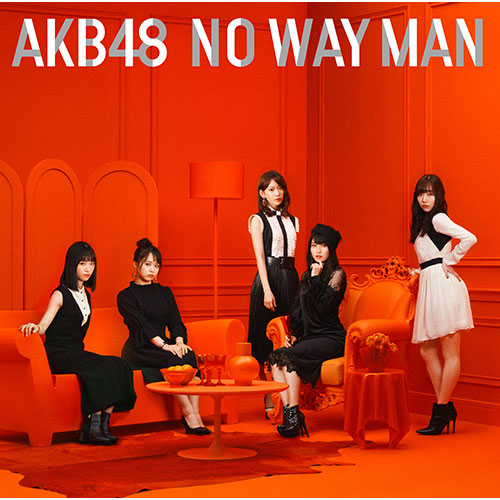

同じ機能を再び使いますか.
yes or no:no
検索機能を再び使いますか.
yes or no:no
ほかの機能を使用しますか.
yes or no:no
ご利用ありがとうございました．


In [23]:
def choice(n):
  if n == 0:
    print('同じ機能を再び使いますか.')
  elif n == 1:
    print('検索機能を再び使いますか.')
  elif n == 2:
    print('ほかのグラフを表示させますか.')
  else:
    print('ほかの機能を使用しますか.')
  
  while True:
    choice = input('yes or no:')
    if choice == 'yes':
      return 0
    elif choice == 'no':
      return 1
    else:
      print('yesかnoのどちらかから選んでください')
      continue

def year(t):
  if t < 2006:
    print('デビュー前なのでデータがありません．')
    return 0
  elif 2022 <= t:
    print('まだデータが存在しません')
    return 0
  else:
    return 1


print('AKB48のCDシングルについての情報について調べられるプログラムです．')

while True:
  print()
  print('どの機能を利用しますか？')
  print('検索:0  グラフ表示:1')
  search1 = int(input('数字を入力:'))
  print()

  if search1 == 0:       #検索
    while True:
      print()
      print('どの検索機能を利用しますか')
      print('タイトル検索:0  発売年検索:1  年ごとの売り上げ枚数の表示:2  ジャケット写真検索:3  センターの人物検索:4 ')
      search2 = int(input('数字を入力:'))

      if search2 == 0:
        #タイトル検索
        while True:
          print()
          search = input('タイトル検索:')
          df1 = df[ df['タイトル'].str.contains('{}'.format(search))]
          df2 = df.index[df['タイトル'].str.contains('{}'.format(search))].tolist()
          if df2 == [] :
            print('入力されたキーワードに該当する曲は存在しません．')
            df1 = pd.DataFrame()
          display(df1)
        
          choice1 = choice(0)
          if choice1 == 0:
            continue
          else:
            break
      
      elif search2 == 1:
        #発売年検索
        while True:
          print()
          search = int(input('発売年検索(西暦):'))
          ans = year(search)
          if ans == 0:
            continue
          df1 = df[ df['発売日'].str.contains('{}.'.format(search))]
          display(df1)

          choice1 = choice(0)
          if choice1 == 0:
            continue
          else:
            break

      elif search2 == 2:
        #年ごとの売り上げ枚数の表示
        while True:
          print()
          search = int(input('どの年？:'))
          ans = year(search)
          if ans == 0:
            continue
          sum = df[ df['発売日'].str.contains('{}'.format(search))]['累計売上(枚)'].sum()
          print('{}年:{}枚'.format(search,sum))

          choice1 = choice(0)
          if choice1 == 0:
            continue
          else:
            break

      elif search2 == 3:
        #ジャケット写真検索
        while True:
          print()
          print('曲名から調べる？年で調べる？')
          search3 = int(input('曲名：0  年：1  センター:2 を入力'))
        
          if search3 == 0:
            kyoku = input('曲名は？:')
            df1 = df.index[df['タイトル'].str.contains('{}'.format(kyoku))].tolist()
            if df1 == []:
              print('そのキーワードが含まれる曲はありません')
            
          elif search3 == 1:
            while True:
              search = int(input('発売年検索(西暦):'))
              ans = year(search)
              if ans == 0:
                continue
              else:
                break
            df1 = df.index[df['発売日'].str.contains('{}'.format(search))].tolist()

          elif search3 == 2:
              person = input('人物名は？:')
              df1 = df.index[df['センター'].str.contains('{}'.format(person))].tolist()
              if df1 == []:
                print('その人はセンターを務めていません')

          else:
            print('0～2で入力してください')
          
          for i in df1:
            print(i)
            file = '{:}.jpg'.format(i)
            img = cv2.imread( file )
            if img is None:
              sys.exit(f'エラー: ファイルを開けませんでした {file}')
            cv2_imshow(img)

          choice1 = choice(0)
          if choice1 == 0:
            continue
          else:
            break

      
      elif search2 == 4:
        #センターになった人物検索
        while True:
          search = input('人物検索:')
          df1 = df[ df['センター'].str.contains('{}'.format(search))]
          df2 = df.index[df['センター'].str.contains('{}'.format(search))].tolist()
          if df2 == [] :
            print('入力された人物はセンターを務めていません．')
            df1 = pd.DataFrame()
          display(df1)

          choice1 = choice(0)
          if choice1 == 0:
            continue
          else:
            break
      
      else:
        print('0～4(半角)の中から選んでください．')
        continue
      
      choice2 = choice(1)
      if choice2 == 0:
        continue
      else:
        break

  elif search1 == 1:        #グラフ
    while True:
      print()
      print('どのグラフを表示させますか．')
      print('累計売上枚数のグラフ:0  年ごとの売り上げ枚数のグラフ:1  センターになった人のなった回数上位10人のグラフ:2  売り上げ枚数上位10曲のグラフ:3')
      search2 = int(input('数字を入力:'))

      if search2 == 0:
        #累計売上枚数のグラフ
        print()
        print('累計売上枚数のグラフ')
        max_index = df['累計売上(枚)'].idxmax()
        min_index = df['累計売上(枚)'].idxmin()
        max = df['累計売上(枚)'].max()
        min = df['累計売上(枚)'].min()
        plt.plot(df['累計売上(枚)'])
        plt.plot(max_index, max, '.', c='r',label='max')
        plt.plot(min_index, min, '.', c='b',label='min')
        plt.legend()
        plt.show()

      elif search2 == 1:
        #年ごとの売り上げ枚数のグラフ
        print()
        print('年ごとの売り上げ枚数のグラフ')
        t = 2006
        list1 = []
        list2 = []
        while t <= 2021:
          sum = df[ df['発売日'].str.contains('{}'.format(t))]['累計売上(枚)'].sum()
          list1.append(t)
          list2.append(sum)
          t += 1
        plt.bar(list1,list2)
        plt.show()

      elif search2 == 2:
        #センターになった人のなった回数上位10人のグラフ 
        list1 = []
        list2 = []
        DF = pd.DataFrame()
        DF.head()
        
        for i in range(len(df)):
          df1 = df.iloc[[i]]['センター']
          name = df1.iloc[-1]
          if name not in list1:
            list1.append(name)
          else:
            continue
        for x in list1:
          count = len( df[ df['センター'].str.contains('{}'.format(x))])
          list2.append(count)
            
        for i in range(len(list1)):
          c1 = list1[i]
          c2 = list2[i]
          DF = DF.append({'name':c1 ,'count':c2},ignore_index=True)
        
        DF_sort = DF.sort_values('count',ascending=False)
        DF10 = DF_sort[:10]
        
        fig, axes = plt.subplots(figsize=(12,6))
        plt.bar(DF10['name'],DF10['count'])
        plt.xlabel('アイドル名')
        plt.ylabel('センターになった回数')
        plt.show()
      
      elif search2 == 3:
        #売り上げ枚数上位10曲のグラフ
        df_music = df.sort_values('累計売上(枚)',ascending=False)
        dfm = df_music[:10]
        
        fig, axes = plt.subplots(figsize=(26,6))
        plt.bar(dfm['タイトル'],dfm['累計売上(枚)'])
        plt.xlabel('曲名')
        plt.ylabel('累計売上(枚)')
        plt.show()
      
      
      
      else:
        print('0～3の数字の中から選んでください')
        continue
      
      choice2 = choice(2)
      if choice2 == 0:
        continue
      else:
        break

  choice3 = choice(3)
  if choice3 == 0:
    continue
  else:
    break

print('ご利用ありがとうございました．')
